In [2]:
# Step 1: Install required libraries (if not already installed)
# Run this line in a Jupyter Notebook cell to install the necessary libraries.
!pip install networkx matplotlib requests scipy

In [3]:
# Step 2: Import required libraries
import requests
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
# Step 3: Function to fetch country names from a public API
def get_country_names():
    url = 'https://restcountries.com/v3.1/all'
    response = requests.get(url)
    countries_data = response.json()
    countries = [country['name']['common'] for country in countries_data]
    return sorted(countries)

In [5]:
# Step 4: Define the list of the top cities (you can expand this list with more cities)
cities = [
    'Tokyo', 'Delhi', 'Shanghai', 'São Paulo', 'Mumbai', 'Cairo', 'Beijing', 'Dhaka', 'Mexico City', 
    'Osaka', 'Karachi', 'Chongqing', 'Istanbul', 'Buenos Aires', 'Kolkata', 'Lagos', 'Kinshasa', 
    'Manila', 'Rio de Janeiro', 'Guangzhou', 'Los Angeles', 'Moscow', 'Lima', 'Jakarta', 'Tehran', 
    'London', 'Bangkok', 'Paris', 'Chicago', 'Baghdad', 'Santiago', 'Riyadh', 'Singapore', 
    'Shenzhen', 'Wuhan', 'Chennai', 'Berlin', 'Ho Chi Minh City', 'Hyderabad', 'Pune', 'Lahore', 
    'Kuala Lumpur', 'Chengdu', 'Ahmedabad', 'Nanjing', 'Hong Kong', 'Bangalore', 'Hanoi', 
    'Shenyang', 'Rangoon', 'Khartoum', 'Alexandria', 'Abidjan', 'Casablanca', 'Melbourne', 
    'Sydney', 'Rome', 'Durban', 'Johannesburg', 'Luanda', 'Addis Ababa', 'Porto Alegre', 
    'Curitiba', 'Brasília', 'Recife', 'Fortaleza', 'Salvador', 'Belém', 'Medellín', 'Caracas', 
    'Barranquilla', 'Cali', 'Maracaibo', 'Lusaka', 'Harare', 'Luang Prabang', 'Vientiane', 
    'Phnom Penh', 'Tashkent', 'Islamabad', 'Damascus', 'Doha', 'Abu Dhabi', 'Dubai', 
    'Sharjah', 'Muscat', 'Kuwait City', 'Jeddah', 'Amman', 'Ankara', 'Tel Aviv', 'Beirut', 
    'Baku', 'Tbilisi', 'Tunis', 'Algiers', 'Tangier', 'Marrakesh', 'Fes', 'Nairobi', 'Mombasa', 
    'Kigali', 'Kampala', 'Bujumbura', 'Antananarivo', 'Maputo', 'Lilongwe', 'Blantyre', 
    'Gaborone', 'Windhoek', 'Luanda', 'Lobito', 'Harare', 'Victoria', 'Port Louis', 
    'Antsirabe', 'Toamasina', 'Moroni', 'Djibouti', 'Asmara', 'Nouakchott', 'Bamako', 'Dakar', 
    'Conakry', 'Freetown', 'Monrovia', 'Accra', 'Kumasi', 'Rajahmundry', 'Niamey', 'Ouagadougou', 
    'Abuja', 'Ibadan', 'Benin City', 'Kano', 'Port Harcourt', 'Lagos', 'Douala', 'Yaoundé', 
    'Libreville', 'Brazzaville', 'Kinshasa', 'Lubumbashi', 'Kisangani', 'Bujumbura', 'Kigali', 
    'Dodoma', 'Dar es Salaam', 'Zanzibar City', 'Addis Ababa', 'Mogadishu', 'Hargeisa', 
    'Djibouti', 'Asmara', 'Khartoum', 'Omdurman', 'Port Sudan', 'Juba', 'Malakal', 'Cairo', 
    'Alexandria', 'Giza', 'Shubra El Kheima', 'Luxor', 'Aswan', 'Suez', 'Ismailia', 'Port Said', 
    'Helwan', 'Damietta', 'Tanta', 'Mansoura', 'Zagazig', 'Qena', 'Beni Suef', 'Minya', 
    'Asyut', 'Sohag', 'Hurghada', 'Sharm El Sheikh', 'Riyadh', 'Jeddah', 'Mecca', 'Medina', 
    'Dammam', 'Khobar', 'Tabuk', 'Hail', 'Najran', 'Abha', 'Khamis Mushait', 'Taif', 
    'Al Ain', 'Ajman', 'Fujairah', 'Dubai', 'Sharjah', 'Abu Dhabi', 'Muscat', 'Salalah', 
    'Manama', 'Doha', 'Kuwait City', 'Baghdad', 'Basra', 'Mosul', 'Karbala', 'Najaf', 
    'Sulaymaniyah', 'Erbil', 'Kirkuk', 'Amman', 'Irbid', 'Zarqa', 'Aqaba', 'Beirut', 'Tripoli', 
    'Sidon', 'Tyre', 'Jerusalem', 'Tel Aviv', 'Haifa', 'Nazareth', 'Gaza City', 'Ramallah', 
    'Hebron', 'Nablus', 'Tulkarm', 'Jericho', 'Dubai', 'Sharjah', 'Abu Dhabi', 'Muscat', 
    'Salalah', 'Manama', 'Doha', 'Kuwait City', 'Basra', 'Riyadh', 'Mecca', 'Jeddah', 
    'Dammam', 'Khobar', 'Amman', 'Jerusalem', 'Cairo', 'Alexandria', 'Giza', 'Shubra El Kheima', 
    'Luxor', 'Aswan', 'Port Said', 'Suez', 'Damietta', 'Tanta', 'Mansoura', 'Zagazig', 
    'Qena', 'Beni Suef', 'Minya', 'Asyut', 'Sohag', 'Hurghada', 'Sharm El Sheikh', 
    'Riyadh', 'Jeddah', 'Mecca', 'Medina', 'Dammam', 'Khobar', 'Tabuk', 'Hail', 'Najran', 
    'Abha', 'Khamis Mushait', 'Taif', 'Al Ain', 'Ajman', 'Fujairah', 'Sharjah', 'Dubai', 
    'Abu Dhabi', 'Muscat', 'Salalah', 'Manama', 'Doha', 'Kuwait City', 'Baghdad', 
    'Basra', 'Mosul', 'Karbala', 'Najaf', 'Sulaymaniyah', 'Erbil', 'Kirkuk', 'Amman', 
    'Irbid', 'Zarqa', 'Aqaba', 'Beirut', 'Tripoli', 'Sidon', 'Tyre', 'Jerusalem', 'Tel Aviv', 
    'Haifa', 'Nazareth', 'Gaza City', 'Ramallah', 'Hebron', 'Nablus', 'Tulkarm', 'Jericho', 
    'Bangalore', 'Mumbai', 'Chennai', 'Hyderabad', 'Kolkata', 'Ahmedabad', 'Surat', 
    'Pune', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Patna', 'Indore', 'Vadodara', 
    'Bhopal', 'Ludhiana', 'Coimbatore', 'Agra', 'Madurai', 'Thane', 'Nashik', 'Varanasi', 
    'Meerut', 'Faridabad', 'Ghaziabad', 'Rajkot', 'Jamshedpur', 'Bhubaneswar', 'Guwahati', 
    'Kochi', 'Visakhapatnam', 'Vijayawada', 'Mysore', 'Hubli-Dharwad', 'Salem', 'Jodhpur', 
    'Tiruchirappalli', 'Guntur', 'Warangal', 'Mangalore', 'Udaipur', 'Siliguri', 'Jalandhar', 
    'Dehradun', 'Bikaner', 'Ajmer', 'Aligarh', 'Gwalior', 'Bareilly', 'Moradabad', 
    'Gorakhpur', 'Rourkela', 'Bhubaneswar', 'Cuttack', 'Ranchi', 'Dhanbad', 'Patiala', 
    'Jamnagar', 'Noida', 'Greater Noida', 'Raipur', 'Chandigarh', 'Amritsar', 'Shimla', 
    'Nainital', 'Vellore', 'Dibrugarh', 'Tinsukia', 'Silchar', 'Tezpur', 'Dimapur', 'Shillong', 
    'Imphal', 'Aizawl', 'Agartala', 'Kohima', 'Itanagar', 'Gangtok', 'Port Blair'
]

In [6]:
# Step 5: Combine countries and cities into one list
def create_combined_dataset():
    countries = get_country_names()
    combined_places = countries + cities
    return combined_places

In [7]:
# Step 6: Create a directed graph based on the Atlas game rules
def create_graph_from_places(places):
    graph = nx.DiGraph()
    
    for place1 in places:
        for place2 in places:
            if place1 != place2 and place1[-1].lower() == place2[0].lower():
                graph.add_edge(place1, place2)
    
    return graph

In [8]:
# Step 7: Function to visualize the graph using NetworkX and Matplotlib
def visualize_graph(graph, title="Graph Visualization"):
    plt.figure(figsize=(15, 15))  # Adjust the size if needed
    nx.draw(graph, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500, font_size=8)
    plt.title(title)
    plt.show()

In [9]:
# Step 8: Perform graph analysis (centrality, density, and diameter)
def analyze_graph(graph):
    # Centrality
    degree_centrality = nx.degree_centrality(graph)
    print("Degree Centrality (Sample):", dict(list(degree_centrality.items())[:10]))  # Show sample of 10

    # Density
    density = nx.density(graph)
    print("Graph Density:", density)

    # Diameter (only works for connected graphs)
    if nx.is_connected(graph.to_undirected()):
        diameter = nx.diameter(graph.to_undirected())
        print("Graph Diameter:", diameter)
    else:
        print("The graph is not connected, so diameter cannot be computed.")

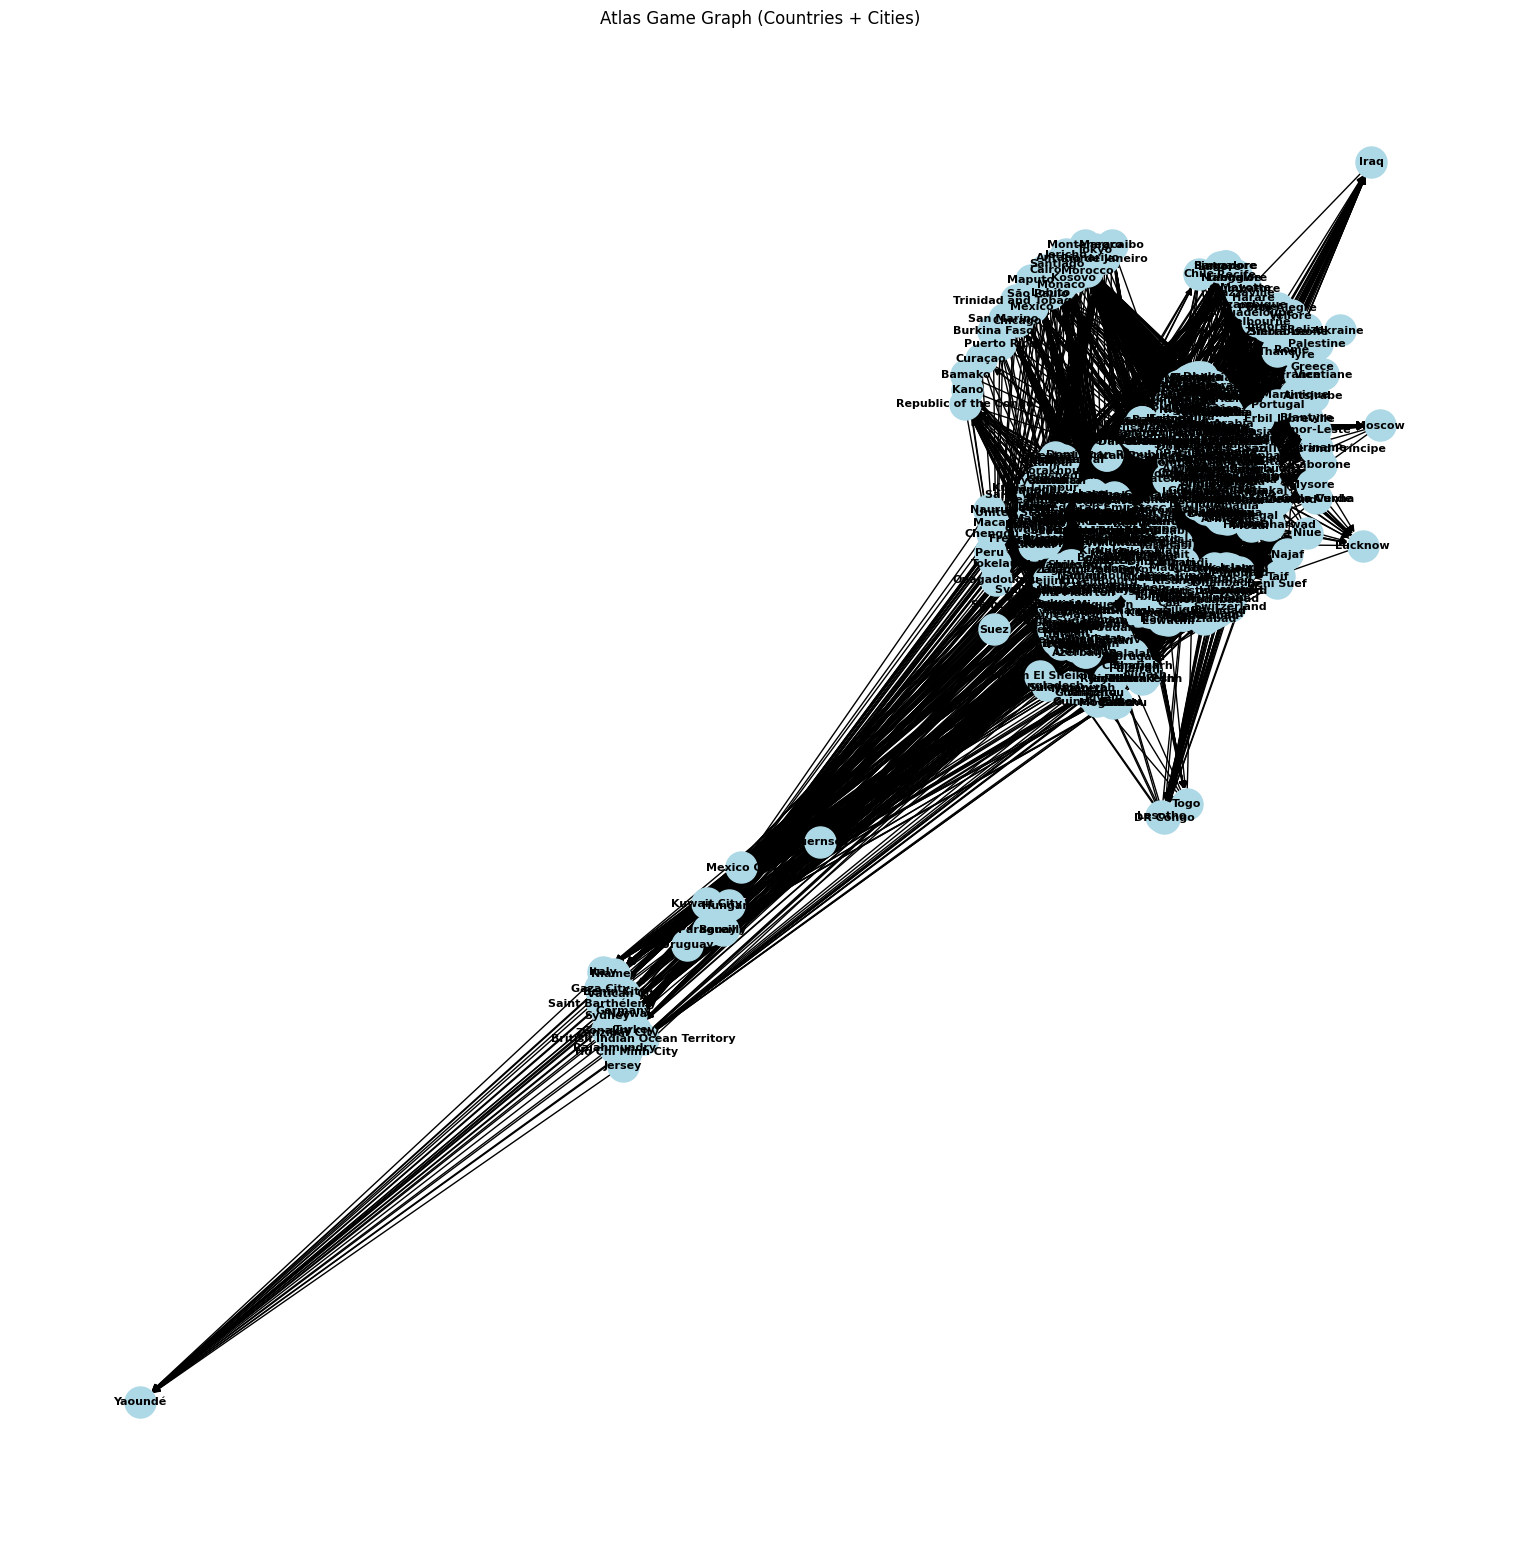

Degree Centrality (Sample): {'Afghanistan': 0.3346080305927342, 'Namibia': 0.17782026768642448, 'Nauru': 0.12045889101338432, 'Nepal': 0.14722753346080306, 'Netherlands': 0.2045889101338432, 'New Caledonia': 0.17782026768642448, 'New Zealand': 0.14149139579349904, 'Nicaragua': 0.17782026768642448, 'Niger': 0.13193116634799235, 'Nigeria': 0.17782026768642448}
Graph Density: 0.051840526615386864
Graph Diameter: 4


In [10]:
# Step 9: Run the complete process
# Get combined dataset of countries and cities
places = create_combined_dataset()

# Create the graph
atlas_graph = create_graph_from_places(places)

# Visualize the graph
visualize_graph(atlas_graph, title="Atlas Game Graph (Countries + Cities)")

# Analyze the graph
analyze_graph(atlas_graph)

In [ ]:
# Task 1: Graph Analysis
# You’ll analyze the Country Only, City Only, and Country+City graphs using the following properties:

# Degree Centrality: Measures the importance of a node based on the number of connections.
# Closeness Centrality: How close a node is to all other nodes.
# Betweenness Centrality: How often a node appears on the shortest path between two other nodes.
# Graph Density: The ratio of actual edges to all possible edges.
# Graph Diameter: The longest shortest path in the graph.

In [11]:
# Centrality Analysis
def analyze_centrality(graph):
    # Degree Centrality
    degree_centrality = nx.degree_centrality(graph)
    print("Degree Centrality (Sample):", dict(list(degree_centrality.items())[:10]))  # Display a sample of 10 nodes
    
    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)
    print("Closeness Centrality (Sample):", dict(list(closeness_centrality.items())[:10]))  # Display a sample of 10 nodes
    
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)
    print("Betweenness Centrality (Sample):", dict(list(betweenness_centrality.items())[:10]))  # Display a sample of 10 nodes

# Density Analysis
def analyze_density(graph):
    density = nx.density(graph)
    print("Graph Density:", density)

# Diameter Analysis
def analyze_diameter(graph):
    if nx.is_connected(graph.to_undirected()):  # Diameter only works if the graph is connected
        diameter = nx.diameter(graph.to_undirected())
        print("Graph Diameter:", diameter)
    else:
        print("The graph is not connected, so diameter cannot be computed.")

# Run the graph analysis
print("----- Centrality Analysis -----")
analyze_centrality(atlas_graph)

print("\n----- Density Analysis -----")
analyze_density(atlas_graph)

print("\n----- Diameter Analysis -----")
analyze_diameter(atlas_graph)


----- Centrality Analysis -----
Degree Centrality (Sample): {'Afghanistan': 0.3346080305927342, 'Namibia': 0.17782026768642448, 'Nauru': 0.12045889101338432, 'Nepal': 0.14722753346080306, 'Netherlands': 0.2045889101338432, 'New Caledonia': 0.17782026768642448, 'New Zealand': 0.14149139579349904, 'Nicaragua': 0.17782026768642448, 'Niger': 0.13193116634799235, 'Nigeria': 0.17782026768642448}
Closeness Centrality (Sample): {'Afghanistan': 0.5669226464046672, 'Namibia': 0.5038703211275524, 'Nauru': 0.5038703211275524, 'Nepal': 0.5038703211275524, 'Netherlands': 0.5038703211275524, 'New Caledonia': 0.5038703211275524, 'New Zealand': 0.5038703211275524, 'Nicaragua': 0.5038703211275524, 'Niger': 0.5038703211275524, 'Nigeria': 0.5038703211275524}
Betweenness Centrality (Sample): {'Afghanistan': 0.006623091778408288, 'Namibia': 0.0016227762385060604, 'Nauru': 0.010547184907459367, 'Nepal': 0.006253571046777815, 'Netherlands': 0.009878720306395581, 'New Caledonia': 0.0016227762385060604, 'New Ze

In [ ]:
# Task 2: Community Detection
# For community detection, we will use two algorithms:

# Girvan-Newman Algorithm.
# Label Propagation Algorithm (on undirected graphs).
# Girvan-Newman Algorithm:

# This algorithm detects communities by removing edges with high betweenness centrality.

In [13]:
from networkx.algorithms.community import girvan_newman

# Girvan-Newman Community Detection
def detect_communities_girvan_newman(graph, title="Graph"):
    communities = girvan_newman(graph)
    top_level_communities = next(communities)
    sorted_communities = [sorted(list(c)) for c in top_level_communities]
    print(f"\nGirvan-Newman Communities for {title} (Sample):", sorted_communities[:5])  # Display top 5 communities

# Example: Community detection for Country graph
detect_communities_girvan_newman(atlas_graph, "Atlas Graph (Countries + Cities)")



Girvan-Newman Communities for Atlas Graph (Countries + Cities) (Sample): [['Abha', 'Abidjan', 'Abu Dhabi', 'Abuja', 'Accra', 'Addis Ababa', 'Afghanistan', 'Agartala', 'Agra', 'Ahmedabad', 'Aizawl', 'Ajman', 'Ajmer', 'Al Ain', 'Albania', 'Alexandria', 'Algeria', 'Algiers', 'Aligarh', 'American Samoa', 'Amman', 'Amritsar', 'Andorra', 'Angola', 'Anguilla', 'Ankara', 'Antananarivo', 'Antarctica', 'Antigua and Barbuda', 'Antsirabe', 'Aqaba', 'Argentina', 'Armenia', 'Aruba', 'Asmara', 'Aswan', 'Asyut', 'Australia', 'Austria', 'Azerbaijan', 'Baghdad', 'Bahamas', 'Bahrain', 'Baku', 'Bamako', 'Bangalore', 'Bangkok', 'Bangladesh', 'Barbados', 'Bareilly', 'Barranquilla', 'Basra', 'Beijing', 'Beirut', 'Belarus', 'Belgium', 'Belize', 'Belém', 'Beni Suef', 'Benin', 'Benin City', 'Berlin', 'Bermuda', 'Bhopal', 'Bhubaneswar', 'Bhutan', 'Bikaner', 'Blantyre', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brasília', 'Brazil', 'Brazzaville', 'British Indian Ocean Territory', 'Britis

In [14]:
from networkx.algorithms.community import label_propagation_communities

# Label Propagation Community Detection (requires undirected graph)
def detect_communities_label_propagation(graph, title="Graph"):
    undirected_graph = graph.to_undirected()  # Convert to undirected
    communities = label_propagation_communities(undirected_graph)
    sorted_communities = [sorted(list(c)) for c in communities]
    print(f"\nLabel Propagation Communities for {title} (Sample):", sorted_communities[:5])  # Display top 5 communities

# Example: Community detection for Country graph
detect_communities_label_propagation(atlas_graph, "Atlas Graph (Countries + Cities)")



Label Propagation Communities for Atlas Graph (Countries + Cities) (Sample): [['Abha', 'Abidjan', 'Abu Dhabi', 'Abuja', 'Accra', 'Addis Ababa', 'Afghanistan', 'Agartala', 'Agra', 'Ahmedabad', 'Aizawl', 'Ajman', 'Ajmer', 'Al Ain', 'Albania', 'Alexandria', 'Algeria', 'Algiers', 'Aligarh', 'American Samoa', 'Amman', 'Amritsar', 'Andorra', 'Angola', 'Anguilla', 'Ankara', 'Antananarivo', 'Antarctica', 'Antigua and Barbuda', 'Antsirabe', 'Aqaba', 'Argentina', 'Armenia', 'Aruba', 'Asmara', 'Aswan', 'Asyut', 'Australia', 'Austria', 'Azerbaijan', 'Baghdad', 'Bahrain', 'Baku', 'Bamako', 'Bangalore', 'Bangkok', 'Bangladesh', 'Bareilly', 'Barranquilla', 'Basra', 'Beijing', 'Beirut', 'Belgium', 'Belize', 'Belém', 'Beni Suef', 'Benin', 'Benin City', 'Berlin', 'Bermuda', 'Bhopal', 'Bhubaneswar', 'Bhutan', 'Bikaner', 'Blantyre', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brasília', 'Brazil', 'Brazzaville', 'British Indian Ocean Territory', 'Brunei', 'Bujumbura', 'Bulgaria', 'B

In [15]:
from networkx.algorithms.community.quality import modularity

# Modularity Evaluation
def evaluate_modularity(graph, communities, title="Graph"):
    mod_value = modularity(graph, communities)
    print(f"Modularity for {title}: {mod_value}")

# Example: Modularity calculation for Label Propagation communities
label_communities = [list(c) for c in label_propagation_communities(atlas_graph.to_undirected())]
evaluate_modularity(atlas_graph.to_undirected(), label_communities, "Atlas Graph (Countries + Cities)")


Modularity for Atlas Graph (Countries + Cities): 0.2304706098811256
